In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Principal Component Analysis (PCA) on Flight Data

To uncover patterns and reduce the dimensionality of our flight data, we performed Principal Component Analysis (PCA) including the "leakage" column alongside other relevant numeric variables. The aim was to understand how "leakage" relates to variables like fuel flow, fuel used, and others in the dataset.

### Steps Undertaken:
1. **Data Selection**: Focused on numeric columns relevant to the flight's fuel metrics and "leakage", excluding identifiers such as flight numbers and timestamps.
2. **Standardization**: Standardized these variables to have a mean of 0 and a standard deviation of 1, necessary for effective PCA.
3. **PCA Execution**: Conducted PCA to reduce the dataset to two principal components for initial analysis, capturing the essence of the dataset in fewer dimensions.
4. **Variance Analysis**: Examined the explained variance by each principal component to assess their significance.

### Results:
- The plot of explained variance indicates how much information each principal component holds.
- Further analysis on principal components can reveal patterns and correlations within the flight data, especially regarding the "leakage" variable's relationship with other metrics.


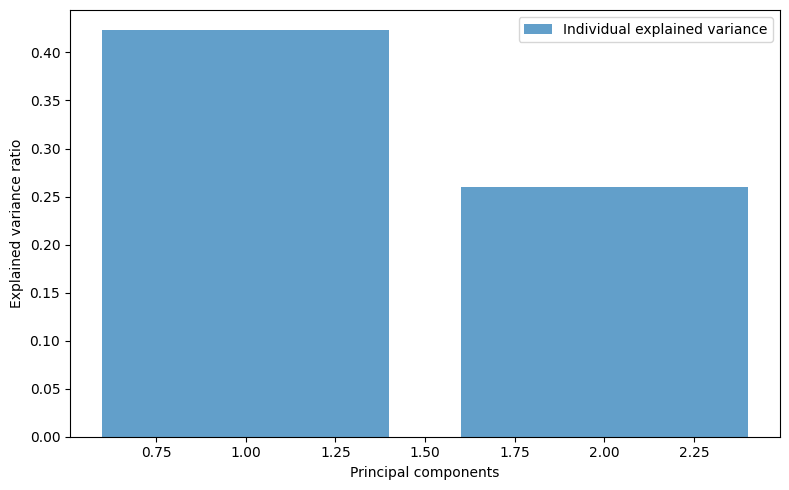

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the dataset
data_path = '/content/drive/My Drive/IE/CORPORATE_PROJECT_AIRBUS/02_Notebooks/Lizz-PCA/data_df_V095.csv'
df = pd.read_csv(data_path)

# Selecting relevant numeric columns (excluding identifier columns like 'UTC_TIME', 'Flight', 'DATE', 'TIME')
columns_to_include = ['FUEL_FLOW_ADDED', 'FUEL_USED_ADDED', 'VALUE_FUEL_QTY_ADDED',
                      'VALUE_FOB', 'DIFF_FOB_VALUE_FUEL', 'FUEL_USED_FOB', 'FUEL_USED', 'leakage']
data_for_pca = df[columns_to_include]

# Imputing missing values with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_for_pca)

# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_imputed)

# Performing PCA
pca = PCA(n_components=2)  # Adjust 'n_components' as needed
principalComponents = pca.fit_transform(data_standardized)

# Creating a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



## Explained Variance Ratio from PCA

The bar chart shows the proportion of the dataset's total variance that is captured by each of the first two principal components generated by the PCA.

- **Principal Component 1**: This component explains approximately 40% of the variance in the dataset. This suggests that this component captures a significant portion of the information contained in the original variables.
- **Principal Component 2**: This component accounts for around 20% of the variance. Although it holds less information than the first component, it still captures a substantial part of the data's structure.

Together, the first two principal components explain about 60% of the total variance. This means that by projecting the data onto these two components, we retain 60% of the information from the original dataset.

### Next Steps:

1. **Review Component Loadings**: Investigate which original variables are most influential on each principal component. This will help us understand what aspects of the data are driving the variance that these components capture.
2. **Decide on the Number of Components**: Depending on the level of variance we wish to capture, we may consider using more than two principal components. A common approach is to choose enough components to explain 70-80% of the variance.
3. **Interpret Components**: Analyze the components in the context of the data to make meaningful interpretations. This involves understanding the component loadings and what they mean for the original variables, especially the "leakage" variable in this case.
4. **Use Components for Further Analysis**: The principal components can be used as inputs for further analysis, such as clustering or as features in a predictive model.
5. **Communicate Findings**: Prepare a report or presentation to communicate the results of the PCA to stakeholders, focusing on the implications for the "leakage" variable and other key metrics in the dataset.
